# Confusing Matrix

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv("large_health_data.csv")

In [3]:
dataset.head(2)

,Patient_ID,Age,Smoking_Status,Lung_Cancer
0,1,56,Non-Smoker,0
1,2,69,Non-Smoker,0


In [4]:
from sklearn.preprocessing import LabelEncoder


In [5]:
le=LabelEncoder()

In [6]:
le.fit_transform(dataset["Smoking_Status"])

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
dataset["Smoking_Status"]=le.fit_transform(dataset["Smoking_Status"])

In [8]:
dataset.head(5)

,Patient_ID,Age,Smoking_Status,Lung_Cancer
0,1,56,0,0
1,2,69,0,0
2,3,46,0,0
3,4,32,0,0
4,5,60,1,1


In [9]:
dataset.drop(columns=["Patient_ID"],inplace=True)

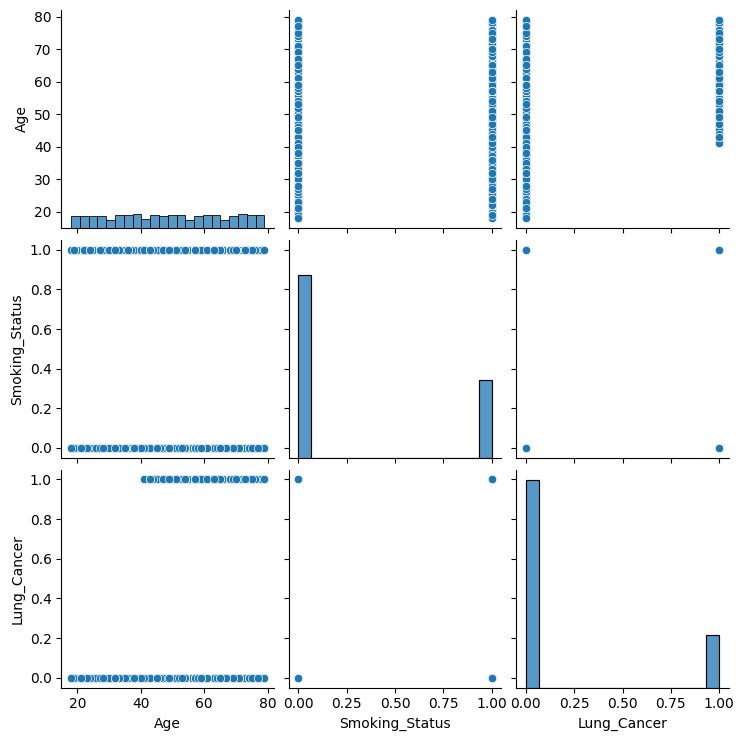

In [10]:
sns.pairplot(dataset)

<Axes: xlabel='Age', ylabel='Lung_Cancer'>

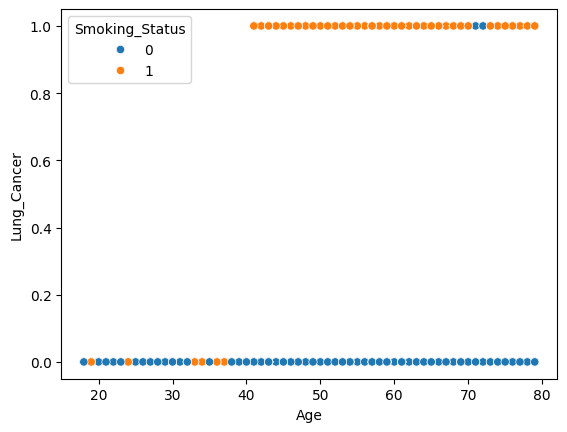

In [11]:
sns.scatterplot(x=dataset["Age"], y=dataset["Lung_Cancer"], hue=dataset["Smoking_Status"])


In [12]:
x=dataset.iloc[:,:-1]
y=dataset["Lung_Cancer"]

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr=LogisticRegression()

In [17]:
lr.fit(x_train,y_train)

LogisticRegression()

In [18]:
lr.score(x_test,y_test)

0.977

In [19]:
lr.predict([[60,1]])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [20]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [26]:
cf=confusion_matrix(y_test,lr.predict(x_test))
cf

array([[1600,    0],
       [  46,  354]], dtype=int64)

<Axes: >

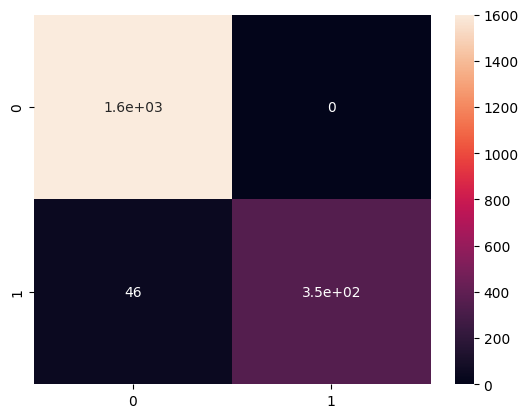

In [25]:
sns.heatmap(cf,annot=True)

# From the above figures of confusing matrix it states that 46 is the false negative value which is Type 2 error(very dangerous)
# TN=1.6e+03,FP=0,FN=46,TP=3.5e+02

In [28]:
precision_score(y_test,lr.predict(x_test))*100

100.0

In [30]:
recall_score(y_test,lr.predict(x_test))*100

88.5

In [33]:
f1_score(y_test,lr.predict(x_test))*100

93.89920424403184